2024-12-22 13:35:42.943920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734874542.960655 3793683 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734874542.965726 3793683 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 13:35:42.987065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981520 entries, 0 to 1981519
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytess                  float64
 15  Flow Packetss                float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max               

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Scaled train features shape: (1981520, 55)

Processing features for the validation dataset...
Validation features (numeric): (424611, 54)
Validation features (categorical): (424611, 0)

Encoding categorical features in validation data...

Combined validation features (before scaling):
    Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                53          23637                  2                       2   
1               443             44                  2                       0   
2             59214              3                  2                       0   
3               443              5                  3                       0   
4                80      116542556                  8                       7   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           76                          108   
1                            0                            0   
2                           12       

/tmp/ipykernel_3793683/432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


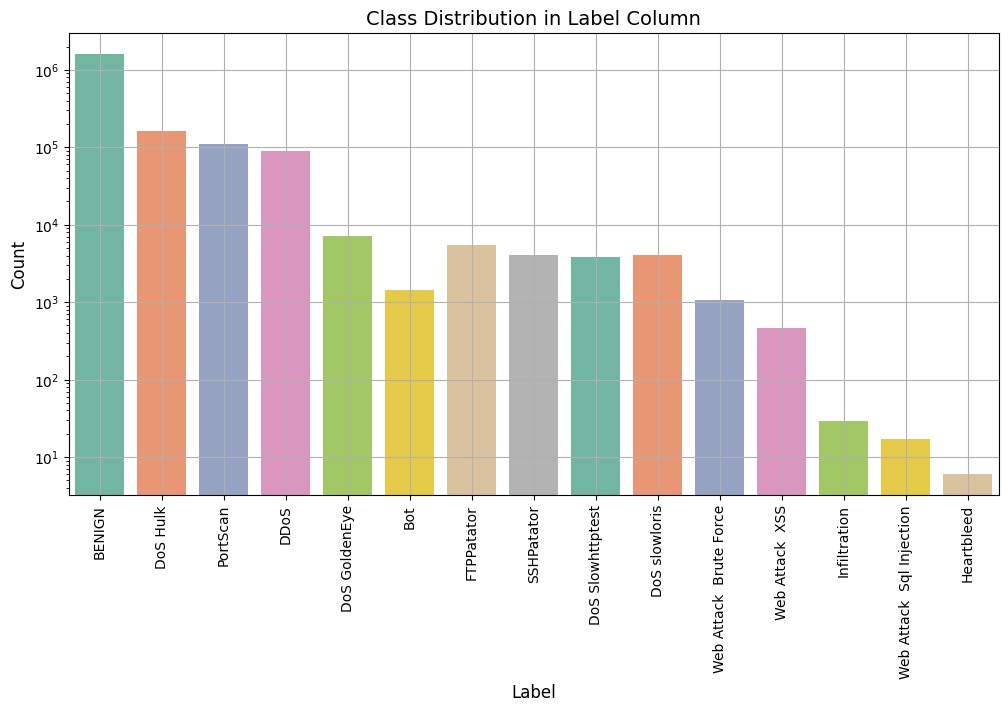

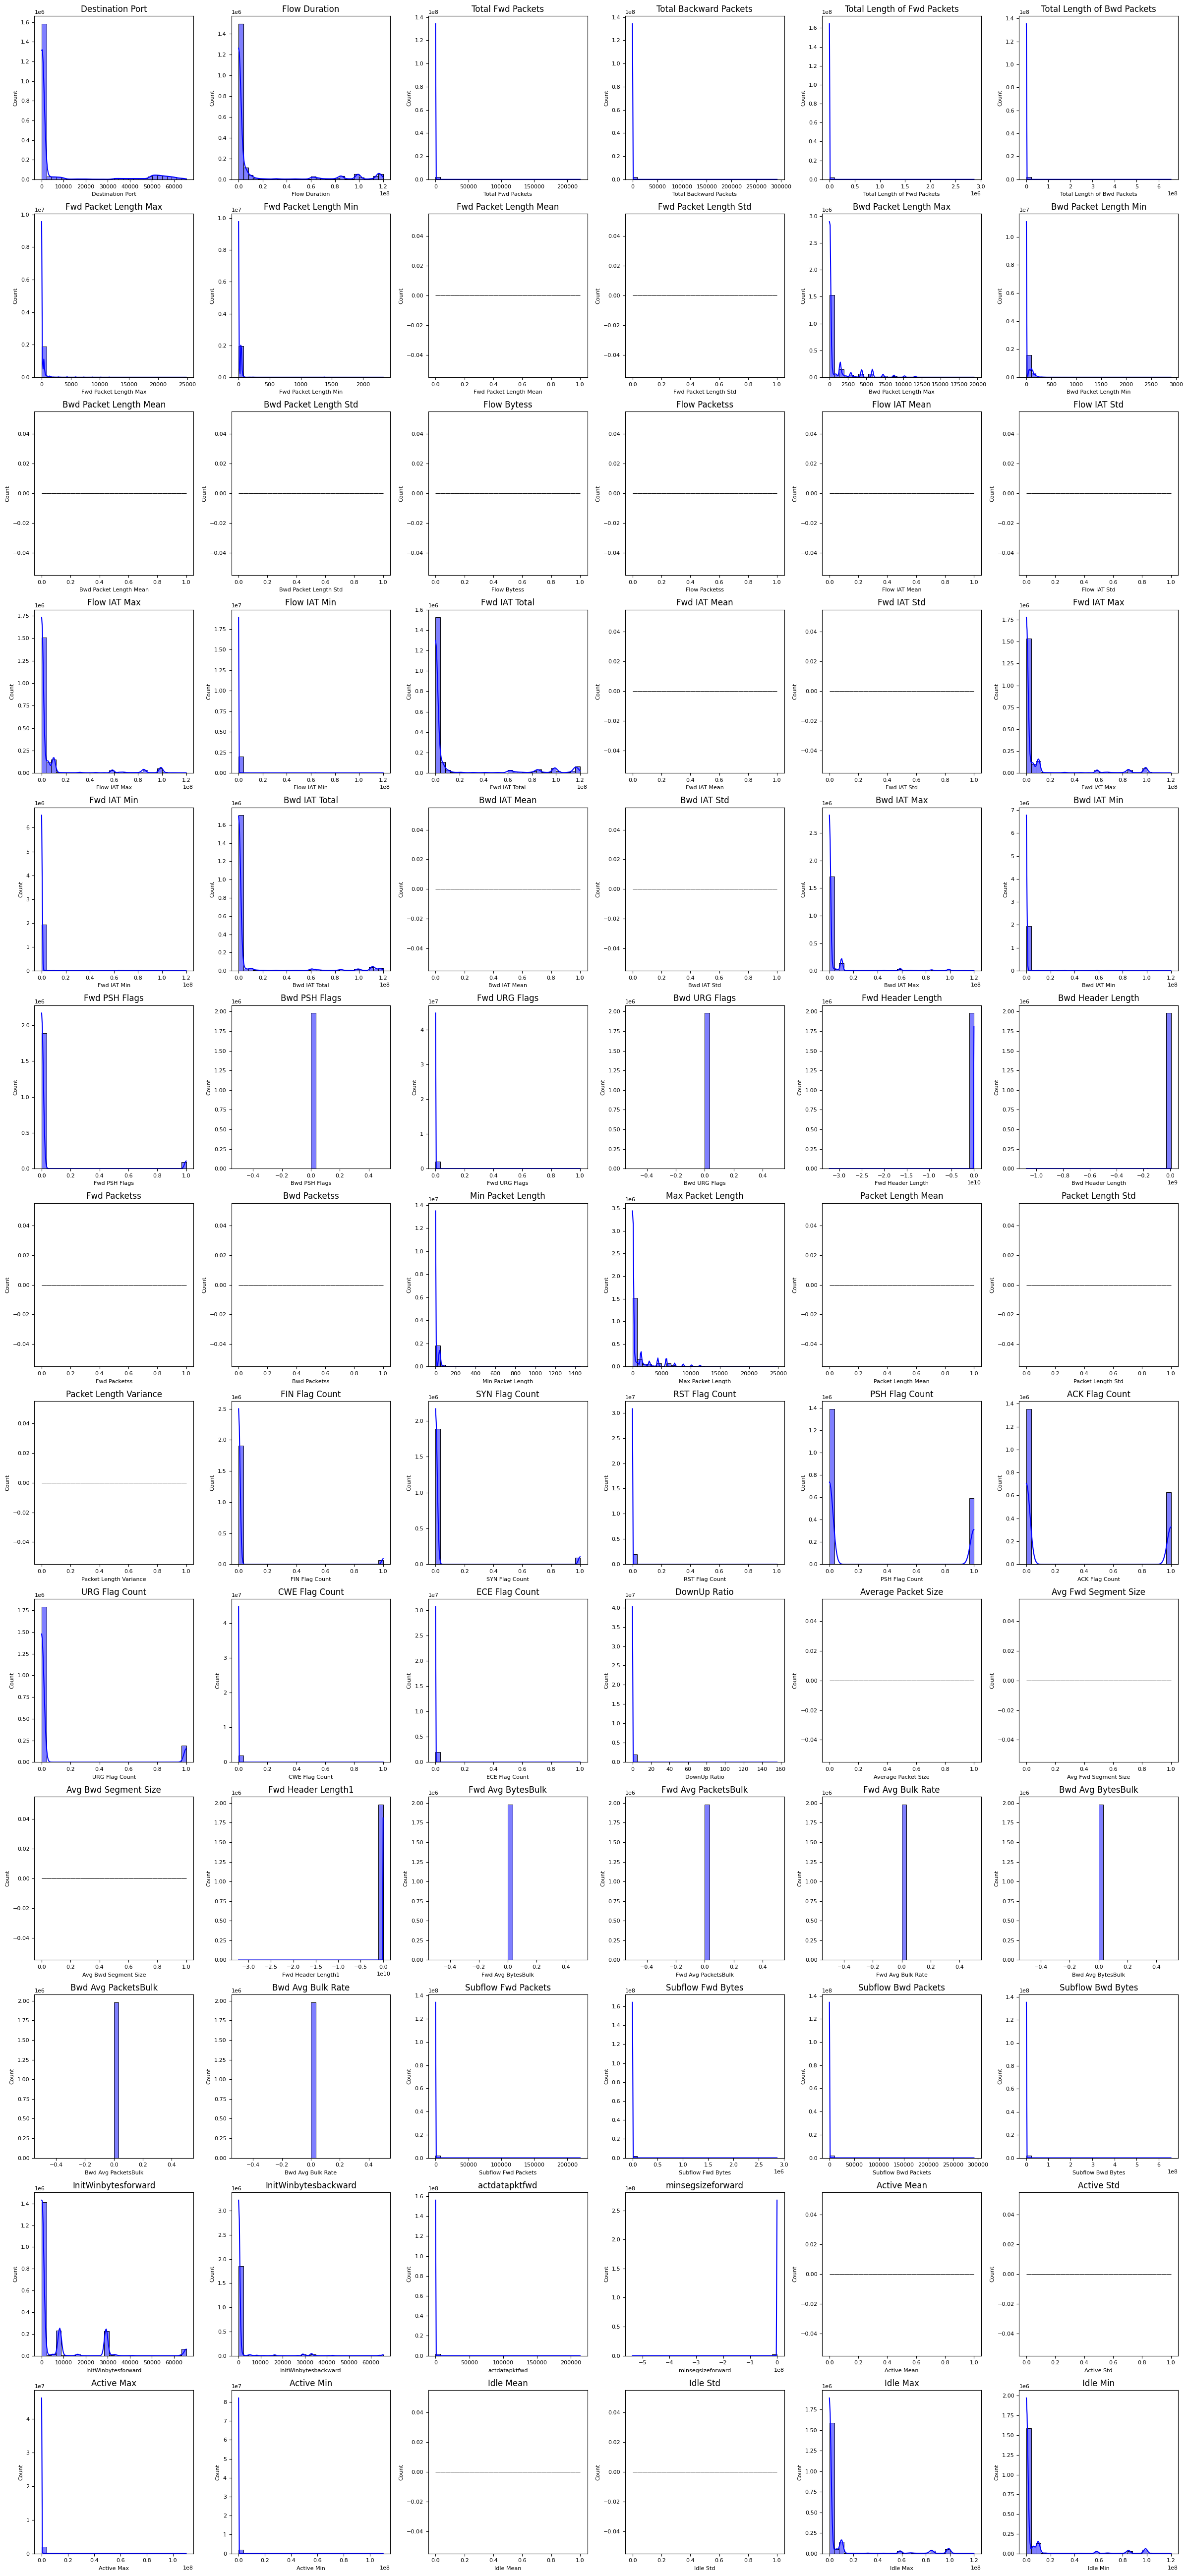

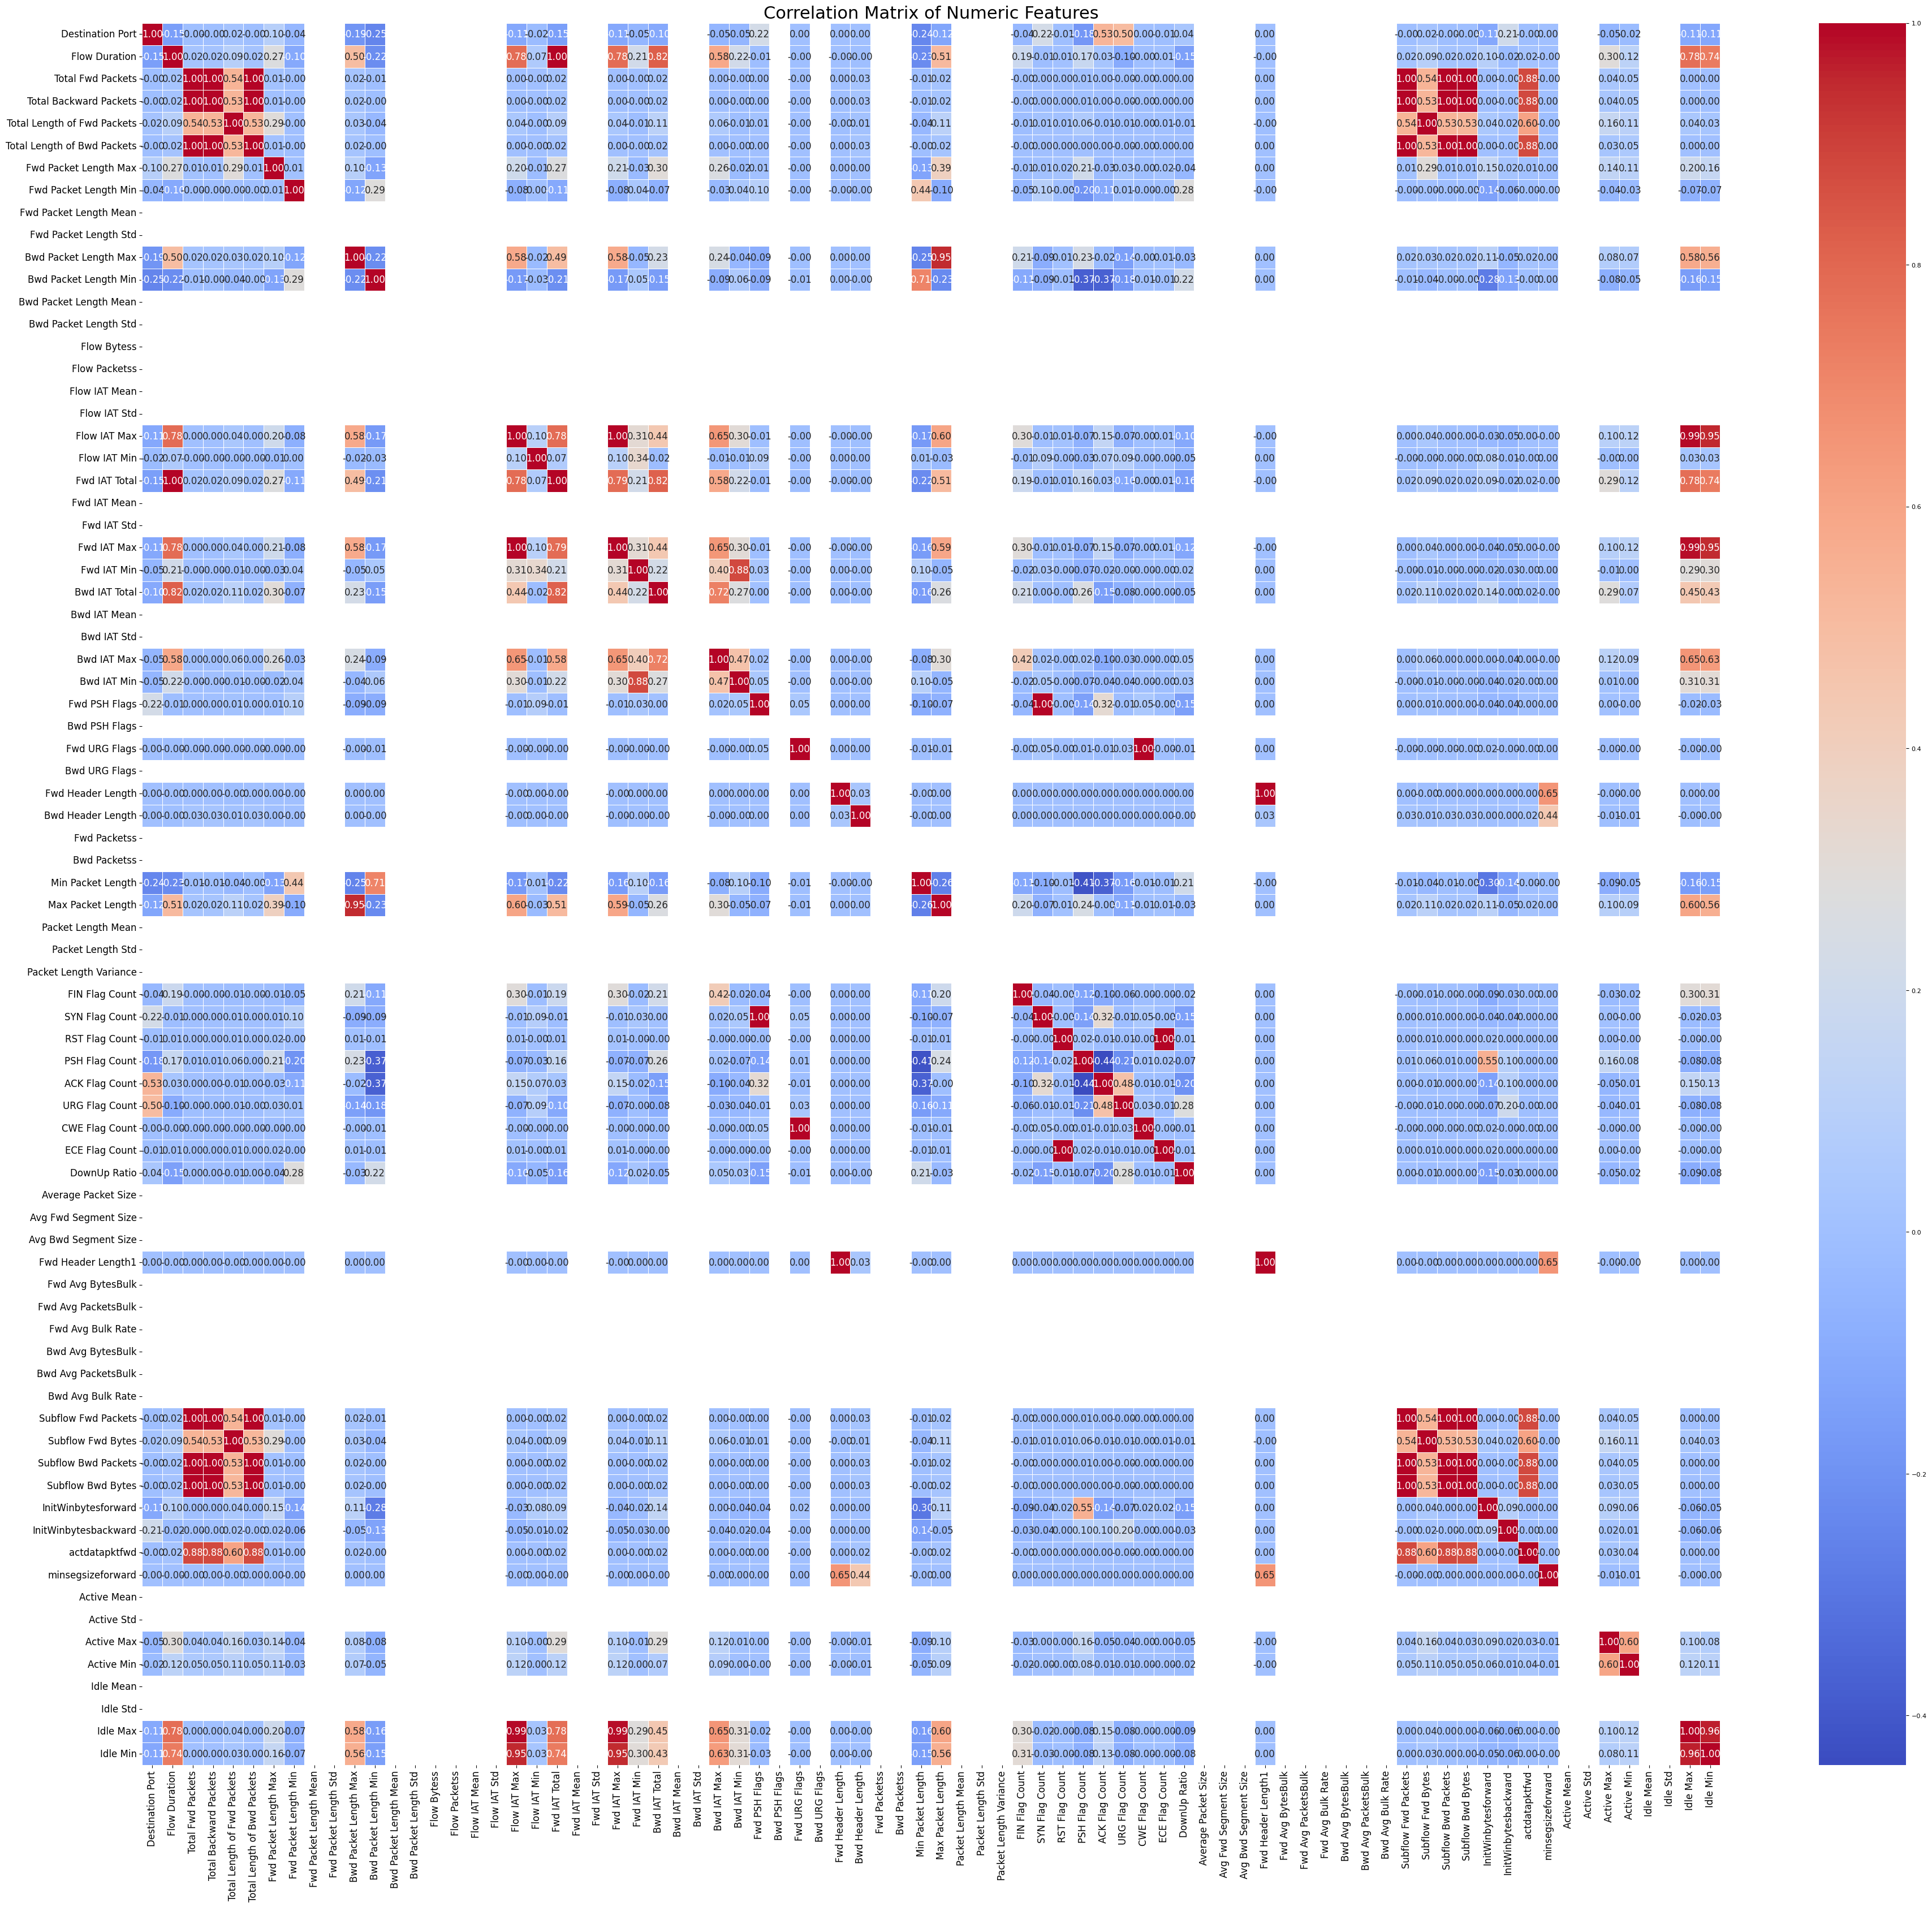

In [1]:
import import_ipynb
%run CICIDS_2017_data_preprocessing.ipynb

In [7]:
from sklearn.impute import SimpleImputer

def fill_na_with_median(X):
    imputer = SimpleImputer(strategy='median')
    return imputer.fit_transform(X)

def check_for_nan(X, name="data"):
    if np.any(np.isnan(X)):
        print(f"Warning: {name} contains NaN values")
    else:
        print(f"{name} has no NaN values.")

X_train = fill_na_with_median(X_train)
X_val = fill_na_with_median(X_val)

check_for_nan(X_train, "X_train")
check_for_nan(X_val, "X_val")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

check_for_nan(X_train_scaled, "X_train_scaled")
check_for_nan(X_val_scaled, "X_val_scaled")

for name, method in methods.items():
    if name in ['Linear Regression', 'Multiple Regression']:
        mse = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'Validation MSE': mse
        })
    elif name in ['PCA', 't-SNE']:
        if name == 'PCA':
            explained_variance = method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Explained Variance Ratio': explained_variance
            })
        elif name == 't-SNE':
            method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Data after t-SNE': 'Transformed'
            })
    else:
        p_value = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'P-Value': p_value
        })

results_df = pd.DataFrame(results)
print("Model Evaluation on Validation Set:")
print(results_df)

results_file = os.path.join(output_dir, 'statistical_method_validation_results.csv')
results_df.to_csv(results_file, index=False)
print(f"Validation set results saved to {results_file}")


/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [54]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [54]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


X_train has no NaN values.
X_val has no NaN values.
X_train_scaled has no NaN values.
X_val_scaled has no NaN values.
Model Evaluation on Validation Set:
                 Model       P-Value  Validation MSE  \
0               t-test  3.722647e-01             NaN   
1                ANOVA  3.722647e-01             NaN   
2               t-test  3.722647e-01             NaN   
3                ANOVA  3.722647e-01             NaN   
4    Linear Regression           NaN        4.279075   
5  Multiple Regression           NaN        4.279075   
6               F-Test  1.110223e-16             NaN   
7  Mann-Whitney U Test  3.472847e-01             NaN   
8                  PCA           NaN             NaN   
9                t-SNE           NaN             NaN   

                     Explained Variance Ratio Data after t-SNE  
0                                         NaN              NaN  
1                                         NaN              NaN  
2                                 

In [8]:
import pandas as pd
import os

results_df['Set'] = 'Validation'

print("\nCombined Results for Statistical Methods:")
print(results_df)

combined_results_file = os.path.join(output_dir, 'combined_statistical_method_results.csv')
results_df.to_csv(combined_results_file, index=False)
print(f"Combined results saved to {combined_results_file}")



Combined Results for Statistical Methods:
                 Model       P-Value  Validation MSE  \
0               t-test  3.722647e-01             NaN   
1                ANOVA  3.722647e-01             NaN   
2               t-test  3.722647e-01             NaN   
3                ANOVA  3.722647e-01             NaN   
4    Linear Regression           NaN        4.279075   
5  Multiple Regression           NaN        4.279075   
6               F-Test  1.110223e-16             NaN   
7  Mann-Whitney U Test  3.472847e-01             NaN   
8                  PCA           NaN             NaN   
9                t-SNE           NaN             NaN   

                     Explained Variance Ratio Data after t-SNE         Set  
0                                         NaN              NaN  Validation  
1                                         NaN              NaN  Validation  
2                                         NaN              NaN  Validation  
3                               

Explained Variance Ratio: [1.70464371e-01 1.60606808e-01 6.59199815e-02 6.30748133e-02
 5.64215627e-02 4.53695033e-02 4.34319256e-02 4.32012866e-02
 3.92360209e-02 3.74597798e-02 2.98338216e-02 2.74004862e-02
 2.56817711e-02 2.46173593e-02 2.18890183e-02 2.14474248e-02
 1.94408767e-02 1.60349038e-02 1.49372229e-02 1.26452303e-02
 1.11255129e-02 9.18481508e-03 7.61832762e-03 6.54345191e-03
 5.89578847e-03 5.82485261e-03 5.47748187e-03 3.83010302e-03
 2.20049050e-03 1.45664718e-03 1.12109842e-03 1.94775670e-04
 1.27200075e-04 9.67438808e-05 6.32623713e-05 5.57577822e-05
 4.52486058e-05 1.89614680e-05 5.30930372e-06 2.71912484e-09
 1.93055619e-17 7.93650042e-18 5.23507240e-18 3.63472472e-18
 5.70249336e-21 4.80386641e-34 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


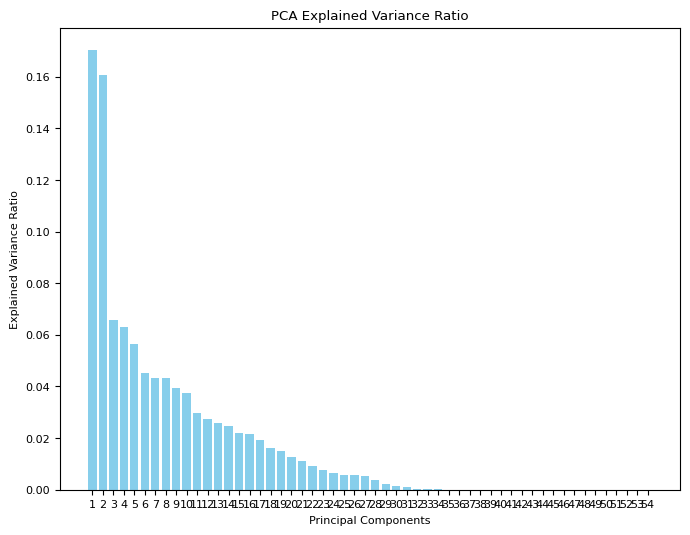

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca(X_train, X_val, y_train, y_val, n_components=None):
    if n_components is None:
        n_components = min(X_train.shape[1], X_val.shape[1])
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

explained_variance = pca(X_train_scaled, X_val_scaled, y_train, y_val)

print("Explained Variance Ratio:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.axhline(0, color='black',linewidth=0.5)  # 添加基线
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


Explained Variance Ratio: [0.17046437 0.16060681 0.06591998 0.06307481 0.05642156 0.0453695
 0.04343193 0.04320129 0.03923602 0.03745978]


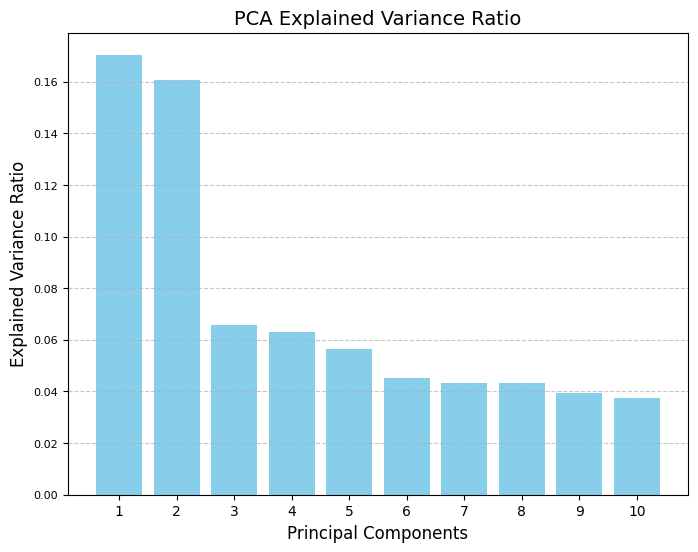

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def pca(X_train, X_val, n_components=None):
    if n_components is None:
        n_components = min(X_train.shape[1], X_val.shape[1])
    pca_model = PCA(n_components=n_components)
    X_train_pca = pca_model.fit_transform(X_train)
    X_val_pca = pca_model.transform(X_val)
    return pca_model.explained_variance_ratio_

explained_variance = pca(X_train_scaled, X_val_scaled, n_components=10)

print("Explained Variance Ratio:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('PCA Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(explained_variance) + 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


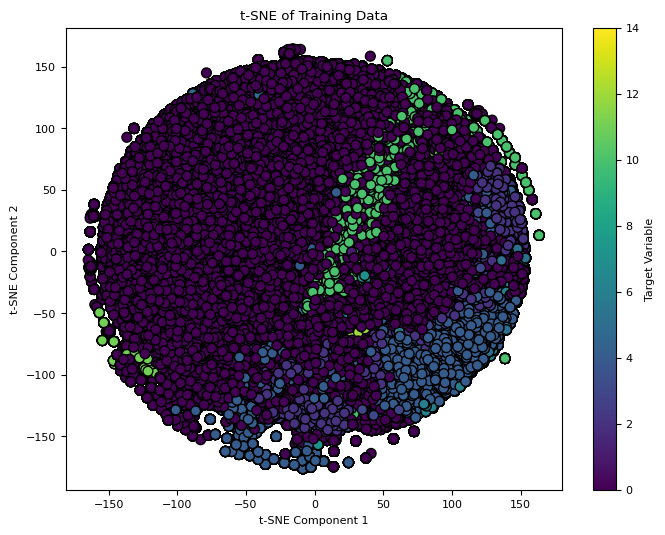

In [12]:
X_train_tsne, X_val_tsne = tsne(X_train_scaled, X_val_scaled, y_train, y_val)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("t-SNE of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Target Variable')
plt.show()


/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [54]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/tmp/ipykernel_3793683/3044351398.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Dataset_T_SNE_Projection.png")
/home/work/soyeong/alvy/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


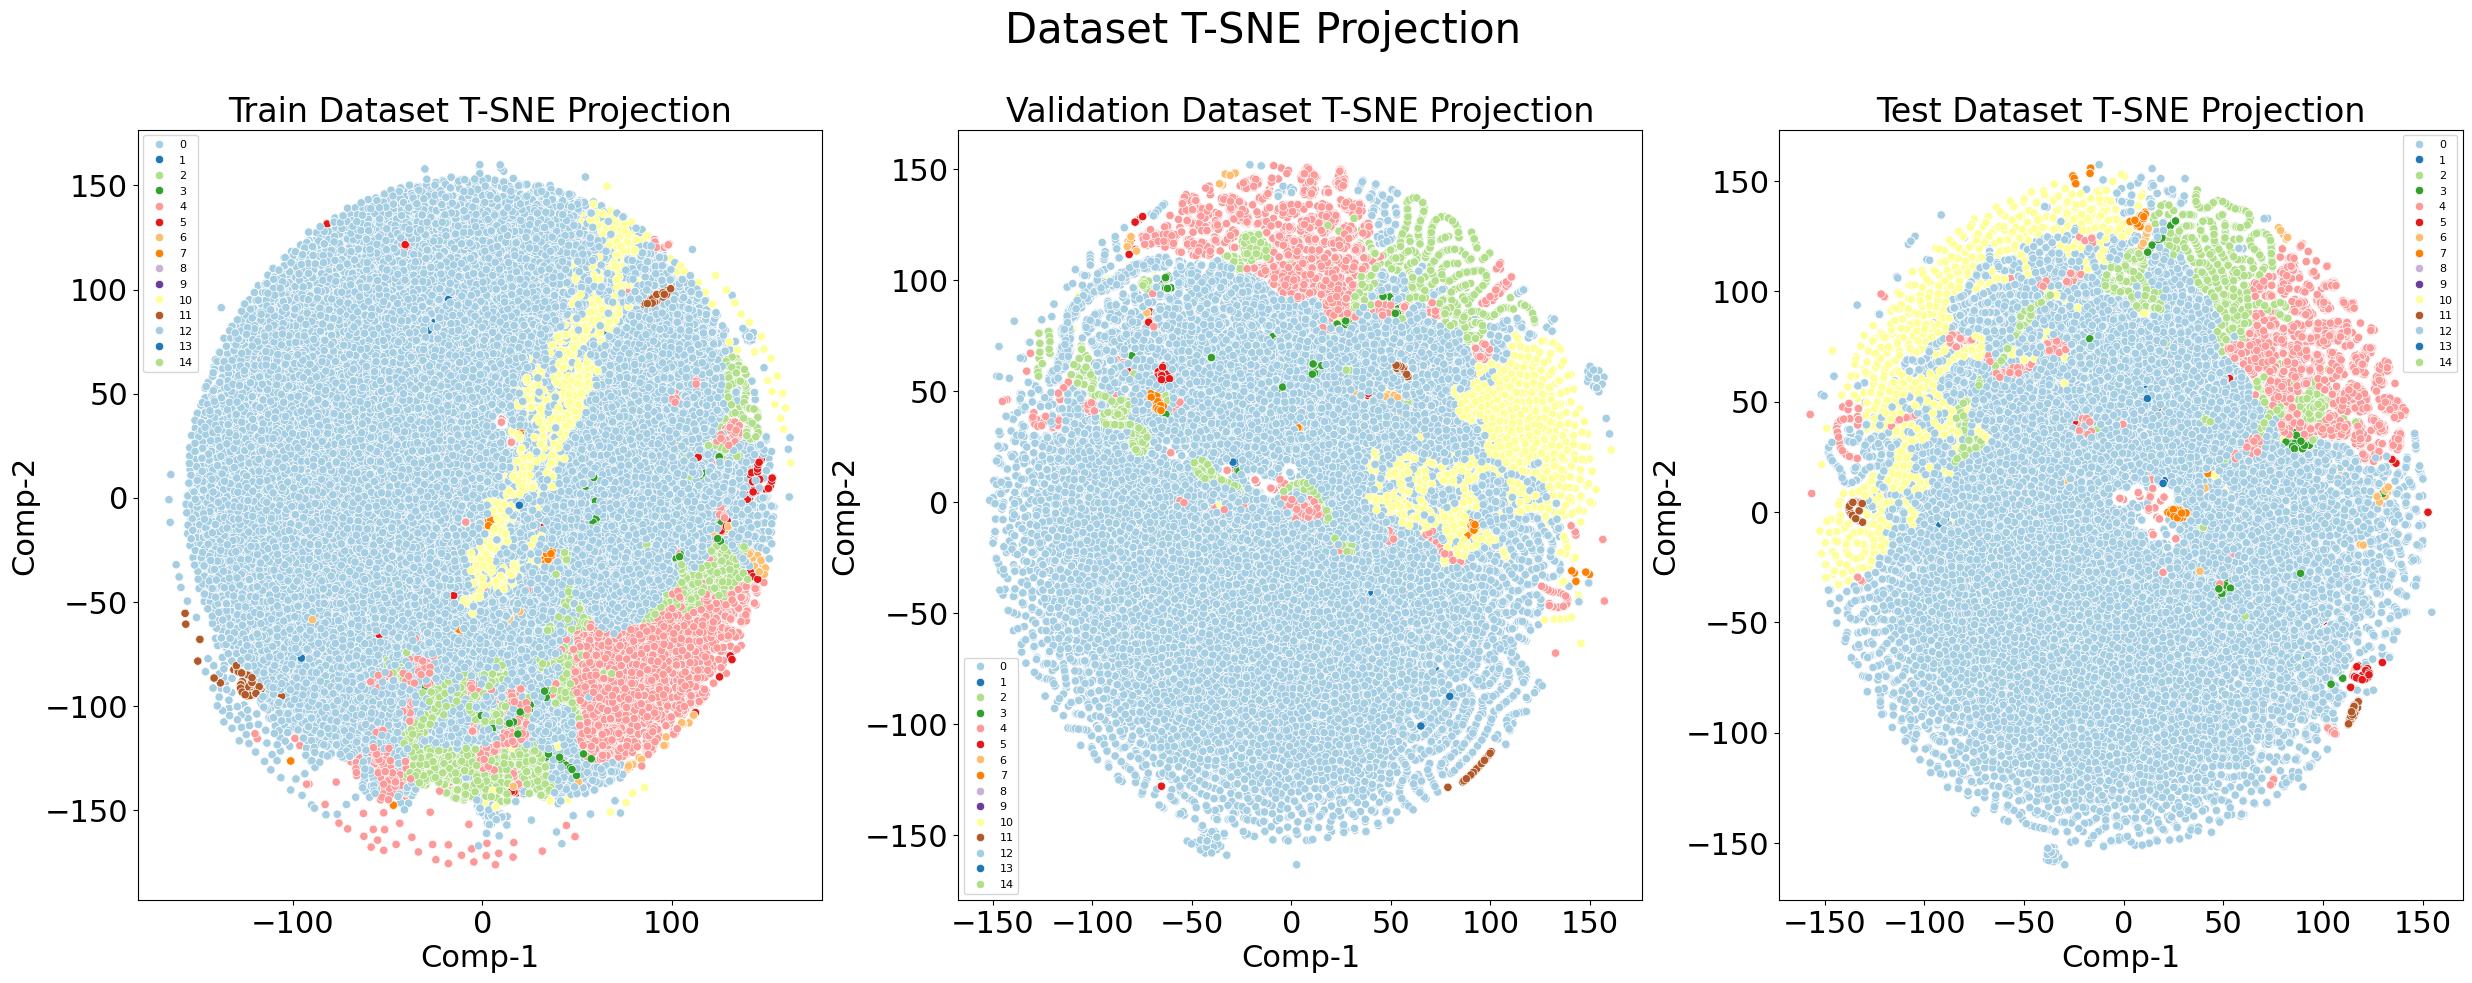

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.impute import SimpleImputer

def preprocess_data(X):
    imputer = SimpleImputer(strategy='mean')
    return imputer.fit_transform(X)

def TSNE_visualizer(X):
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(X)

X_train_preprocessed = preprocess_data(np.array(X_train, dtype='float'))
X_val_preprocessed = preprocess_data(np.array(X_val, dtype='float'))
X_test_preprocessed = preprocess_data(np.array(X_test, dtype='float'))

t_sne_train = TSNE_visualizer(X_train_preprocessed)
t_sne_val = TSNE_visualizer(X_val_preprocessed)
t_sne_test = TSNE_visualizer(X_test_preprocessed)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

titles = ["Train", "Validation", "Test"]
c = [y_train, y_val, y_test]

for i in range(3):
    ax = axes[i]
    t_sne_data = [t_sne_train, t_sne_val, t_sne_test][i]
    sns.scatterplot(x=t_sne_data[:, 0], y=t_sne_data[:, 1], hue=c[i], ax=ax, palette="Paired")
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection", fontsize=24)
    ax.set_xlabel('Comp-1', fontsize=22)
    ax.set_ylabel('Comp-2', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)

plt.suptitle('Dataset T-SNE Projection', size=30, y=1.0)
plt.savefig("Dataset_T_SNE_Projection.png")
plt.show()
